In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
df=pd.read_excel(r"C:\Users\User\Downloads\Dataset (3).xlsx")

In [2]:
df.head() #printing out the first few lines of the training dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [3]:
df2=pd.read_excel(r"C:\Users\User\Downloads\EXL_EQ_2019_Output_Template_Round1 (4).xlsx",'Test data- Fraud Found',skiprows=7)
df2.head() #printing out the first few lines of the test dataset

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,FraudFound_P
0,1,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,No,No,External,none,no change,1 vehicle,1994,Collision,56711.16,NaN
1,2,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,...,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,60746.44,NaN
2,3,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,...,No,No,External,none,no change,1 vehicle,1994,Collision,74173.64,NaN
3,4,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,...,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,2482.01,NaN
4,5,Apr,4,Monday,Honda,Urban,Tuesday,May,1,Male,...,No,No,External,more than 5,no change,1 vehicle,1994,Liability,88101.03,NaN


In [4]:
df2=df2.drop(df2.columns[0], axis=1) #Rearranging the column structure of the test dataset
df2.head()  

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,FraudFound_P
0,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,56711.16,NaN
1,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,60746.44,NaN
2,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,74173.64,NaN
3,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,2482.01,NaN
4,Apr,4,Monday,Honda,Urban,Tuesday,May,1,Male,Married,...,No,No,External,more than 5,no change,1 vehicle,1994,Liability,88101.03,NaN


In [5]:
# Now converting the column entries of the training dataset to corresponding so that it becomes easier to feed it in a MACHINE LEARNING Algorithm

df.Sex.replace({'Female':0, 'Male':1},inplace=True)
df.DayOfWeek.replace({'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)
df.Make.replace({'Honda':1, 'Toyota':2, 'Mazda':3, 'Ford':4, 'Chevrolet':5, 'Pontiac':6,
       'Dodge':7, 'Accura':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19},inplace=True)
df.AccidentArea.replace({'Urban':0, 'Rural':1},inplace=True)
df.DayOfWeekClaimed.replace({'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)
df.MonthClaimed.replace({'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11, 'Dec':12},inplace=True)
df.MaritalStatus.replace({'Single':0, 'Married':1,'Divorced':2,'Widow':3},inplace=True)
df.AgeOfPolicyHolder.replace({'26 to 30':4, '31 to 35':5, '41 to 50':7, '51 to 65':8, '36 to 40':6,
       'over 65':9, '16 to 17':1, '18 to 20':2, '21 to 25':3},inplace=True)
df.PoliceReportFiled.replace({'No':0, 'Yes':1},inplace=True)
df.WitnessPresent.replace({'No':0, 'Yes':1},inplace=True)
df.Fault.replace({'Policy Holder':0, 'Third Party':1},inplace=True)
df.PolicyType.replace({'Sport - Liability':1, 'Sport - Collision':2, 'Sedan - Liability':3,
       'Sedan - All Perils':4, 'Sedan - Collision':5, 'Utility - Collision':6,
       'Utility - Liability':7, 'Utility - All Perils':8,
       'Sport - All Perils':9},inplace=True)
df.VehicleCategory.replace({'Sport':1, 'Sedan':2, 'Utility':3},inplace=True)
df.VehiclePrice.replace({'more than 69000':6, '20000 to 29000':2, '30000 to 39000':3,
       'less than 20000':1, '40000 to 59000':4, '60000 to 69000':5},inplace=True)
df.Days_Policy_Accident.replace({'more than 30':4, '15 to 30':3, 'none':0, '1 to 7':1, '8 to 15':2},inplace=True)
df.Days_Policy_Claim.replace({'more than 30':3, '15 to 30':2, 'none':0, '8 to 15':1},inplace=True)
df.AgeOfVehicle.replace({'3 years':3, '6 years':6, '7 years':7, 'more than 7':8, 'new':1, '5 years':5,'4 years':4, '2 years':2},inplace=True)
df.PastNumberOfClaims.replace({'none':0, '2 to 4':2, 'more than 4':3},inplace=True)
df.AgentType.replace({'External':1, 'Internal':0},inplace=True)
df.NumberOfSuppliments.replace({'none':0, 'more than 5':3, '1 to 2':1, '3 to 5':2},inplace=True)
df.AddressChange_Claim.replace({'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,'under 6 months':1},inplace=True)
df.NumberOfCars.replace({'3 to 4':3, '1 vehicle':1, '2 vehicles':2, '5 to 8':4, 'more than 8':5},inplace=True)
df.BasePolicy.replace({'Liability':1, 'Collision':2, 'All Perils':3},inplace=True)
df.Month.replace({'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11, 'Dec':12},inplace=True)

In [6]:
# Now converting the column entries of the training dataset to corresponding so that it becomes easier to feed it in a MACHINE LEARNING Algorithm

df2.Sex.replace({'Female':0, 'Male':1},inplace=True)
df2.DayOfWeek.replace({'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)
df2.Make.replace({'Honda':1, 'Toyota':2, 'Mazda':3, 'Ford':4, 'Chevrolet':5, 'Pontiac':6,
       'Dodge':7, 'Accura':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19},inplace=True)
df2.AccidentArea.replace({'Urban':0, 'Rural':1},inplace=True)
df2.DayOfWeekClaimed.replace({'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)
df2.MonthClaimed.replace({'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11, 'Dec':12},inplace=True)
df2.MaritalStatus.replace({'Single':0, 'Married':1,'Divorced':2,'Widow':3},inplace=True)
df2.AgeOfPolicyHolder.replace({'26 to 30':4, '31 to 35':5, '41 to 50':7, '51 to 65':8, '36 to 40':6,
       'over 65':9, '16 to 17':1, '18 to 20':2, '21 to 25':3},inplace=True)
df2.PoliceReportFiled.replace({'No':0, 'Yes':1},inplace=True)
df2.WitnessPresent.replace({'No':0, 'Yes':1},inplace=True)
df2.Fault.replace({'Policy Holder':0, 'Third Party':1},inplace=True)
df2.PolicyType.replace({'Sport - Liability':1, 'Sport - Collision':2, 'Sedan - Liability':3,
       'Sedan - All Perils':4, 'Sedan - Collision':5, 'Utility - Collision':6,
       'Utility - Liability':7, 'Utility - All Perils':8,
       'Sport - All Perils':9},inplace=True)
df2.VehicleCategory.replace({'Sport':1, 'Sedan':2, 'Utility':3},inplace=True)
df2.VehiclePrice.replace({'more than 69000':6, '20000 to 29000':2, '30000 to 39000':3,
       'less than 20000':1, '40000 to 59000':4, '60000 to 69000':5},inplace=True)
df2.Days_Policy_Accident.replace({'more than 30':4, '15 to 30':3, 'none':0, '1 to 7':1, '8 to 15':2},inplace=True)
df2.Days_Policy_Claim.replace({'more than 30':3, '15 to 30':2, 'none':0, '8 to 15':1},inplace=True)
df2.AgeOfVehicle.replace({'3 years':3, '6 years':6, '7 years':7, 'more than 7':8, 'new':1, '5 years':5,'4 years':4, '2 years':2},inplace=True)
df2.PastNumberOfClaims.replace({'none':0, '2 to 4':2, 'more than 4':3},inplace=True)
df2.AgentType.replace({'External':1, 'Internal':0},inplace=True)
df2.NumberOfSuppliments.replace({'none':0, 'more than 5':3, '1 to 2':1, '3 to 5':2},inplace=True)
df2.AddressChange_Claim.replace({'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,'under 6 months':1},inplace=True)
df2.NumberOfCars.replace({'3 to 4':3, '1 vehicle':1, '2 vehicles':2, '5 to 8':4, 'more than 8':5},inplace=True)
df2.BasePolicy.replace({'Liability':1, 'Collision':2, 'All Perils':3},inplace=True)
df2.Month.replace({'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11, 'Dec':12},inplace=True)

In [7]:
df['FraudFound_P']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11535    1
11536    0
11537    0
11538    0
11539    0
11540    0
11541    0
11542    0
11543    0
11544    0
11545    0
11546    0
11547    0
11548    0
11549    0
11550    0
11551    0
11552    0
11553    0
11554    0
11555    0
11556    0
11557    1
11558    0
11559    0
11560    0
11561    0
11562    1
11563    0
11564    1
Name: FraudFound_P, Length: 11565, dtype: int64

In [9]:
import numpy as np

# Replacing the infinity or large values with the respective not a number value(NaN) and then replaced the NaN value with the median values
df.replace([np.inf,-np.inf], np.nan)
df2.replace([np.inf,-np.inf], np.nan)
df.fillna(df.ClaimSize.median(),inplace=True)
df2.fillna(df.ClaimSize.median(),inplace=True)

In [10]:
# We now decide to train the model using Logistic Regression

model=LogisticRegression()

In [24]:
# Taking the corresponding important features to train the model

X=df[['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy',
 'ClaimSize']]
Y=df['FraudFound_P']

In [25]:
X.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,1,0,2,1,1,0,0,...,4,0,0,1,0,2,3,1994,1,55526.069421
1,1,3,3,1,0,1,1,4,1,0,...,5,1,0,1,0,0,1,1994,2,59294.455571
2,10,5,5,1,0,4,11,2,1,1,...,7,0,0,1,0,0,1,1994,2,71756.941320
3,6,2,6,2,1,5,7,1,1,1,...,8,1,0,1,3,0,1,1994,1,7584.153493
4,2,1,6,1,0,1,2,3,1,1,...,6,0,0,1,1,0,1,1994,2,98545.374339


In [26]:
model.fit(X,Y) #Training the Model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pd.value_counts(df.FraudFound_P) #Finding out the number of frauds and not frauds in the training set

0    10880
1      685
Name: FraudFound_P, dtype: int64

In [28]:
# Taking X2 as the corresponding input features of the test dataset 
    
X2=df2[['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy',
 'ClaimSize']]
X2.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,1,5,1,1,0,2,2,2,0,0,...,5,0,0,1,0,0,1,1994,2,56711.16
1,10,4,5,1,0,3,11,1,1,0,...,3,0,0,1,2,0,1,1994,2,60746.44
2,11,1,5,1,0,2,3,4,1,0,...,1,0,0,1,0,0,1,1994,2,74173.64
3,4,3,2,4,0,3,4,3,1,1,...,6,0,0,1,2,0,1,1994,3,2482.01
4,4,4,1,1,0,2,5,1,1,1,...,5,0,0,1,3,0,1,1994,1,88101.03


In [29]:
# The code in this cell tells us the actual probabilities of a claim being not fraud and fraud

k=model.predict_proba(X2)
print(k) #the 1st element is for not fraud and the next is for fraud

[[0.94769471 0.05230529]
 [0.95860729 0.04139271]
 [0.91397011 0.08602989]
 ...
 [0.98589457 0.01410543]
 [0.98425241 0.01574759]
 [0.94384132 0.05615868]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

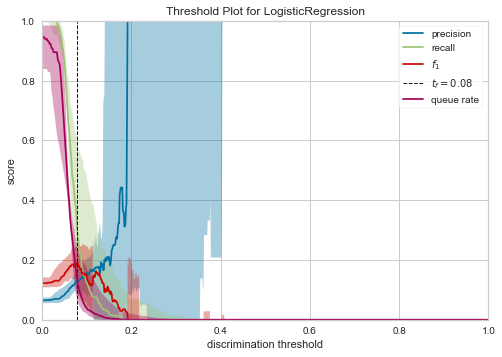

In [30]:
# We now see that due to abundance of 0's and less number of 1's the algorithm will predict 0 all the time if the threshold for logistic regression is set to the default 0.5. But in such cases where a particular value is in abundance compared to the other accuracy may not be a great measure. A good measure would be to vary the threshold to see which value of it gives the maximum F-Score.

from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model)

visualizer.fit(X,Y)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data

# The above classifier plots the graphs and gives us the threshold value for which F-score value is maximum.

In [31]:
# As we can see from the plot that the required threshold value comes out to be 0.08.

In [32]:
# Creating a List k1 to store the respective predicted values (fraud/not fraud) with the new threshold

k1=[]
for i in range(len(k)):
    m=int(k[i][0]<=0.92)
    k1.append(m)

In [33]:
k1

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [34]:
# k1 now represents the corresponding predicted values (0/1) for the test dataset

In [35]:
# checking the number of fraud and not fraud cases in the test dataset

t=0
d=0
for h in range(len(k1)):
    if k1[h]==0:
        t+=1
    else:
        d+=1
print (t) # t represents not fraud cases
print (d) # d represents fraud cases

2993
862


In [36]:
# According to the algorithm there are 2993 not fraud cases and 862 fraud cases in our test dataset

In [37]:
df2.FraudFound_P=k1

In [38]:
df2

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,FraudFound_P
0,1,5,1,1,0,2,2,2,0,0,...,0,0,1,0,0,1,1994,2,56711.16,0
1,10,4,5,1,0,3,11,1,1,0,...,0,0,1,2,0,1,1994,2,60746.44,0
2,11,1,5,1,0,2,3,4,1,0,...,0,0,1,0,0,1,1994,2,74173.64,1
3,4,3,2,4,0,3,4,3,1,1,...,0,0,1,2,0,1,1994,3,2482.01,1
4,4,4,1,1,0,2,5,1,1,1,...,0,0,1,3,0,1,1994,1,88101.03,0
5,8,3,7,3,0,4,8,5,1,1,...,0,0,1,1,0,1,1994,1,56274.98,0
6,6,3,6,6,0,2,6,3,1,0,...,0,0,1,2,0,1,1994,1,64579.36,0
7,9,3,5,3,0,5,9,3,1,1,...,1,0,1,0,0,1,1994,3,58466.53,1
8,5,3,7,8,0,5,5,4,1,1,...,0,0,1,1,0,1,1994,3,77669.21,1
9,3,1,7,1,0,2,3,2,1,0,...,0,0,1,0,0,1,1994,2,64322.08,1


In [39]:
# This shows the corresponding values of FraudFound_P for the test dataset

In [40]:
# All that is left is writing the values back to the test set file which can be done in the following way

df2.to_excel("C:/Users/User/Downloads/EXL_EQ_2019_Output_Template_Round1 (1).xlsx",index=False)